Importing

In [102]:
import torch
from torch.optim import Adamax
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


Function to Model

In [103]:
def f(x):
    y = -5*x**3 + x**2 + x + 2
    return y


def f_1(x):
    y = -15*x**2 + 2*x + 1
    return y


Sampling from defined function

In [104]:
# number of samples
num = 100
# size of sampling and input layer
len = 1

#l = np.random.rand()*-10
#u = l+10
#X = np.linspace(l, u, len)
X = np.random.rand()*10

for i in range(num-1):
    #l = np.random.rand()*-10
    #u = l+10
    #new = np.linspace(l, u, len)
    #X = np.append(X, new)
    X = np.append(X, np.random.rand()*10)

Y =  f(X)

X = torch.from_numpy(X).float().view(-1,1)
Y = torch.from_numpy(Y).float().view(-1,1)


Defining the Model, Loss and Optimizer

In [105]:
# Model with 3 layers, len i/o nodes, i_len nodes per layer and ReLu activation
i_len = 30 #3*len

model = nn.Sequential(
    nn.Linear(len, i_len),
    nn.ELU(),
    nn.Linear(i_len, i_len),
    nn.ELU(),
    nn.Linear(i_len, i_len),
    nn.ELU(),
    nn.Linear(i_len, len)
    )

# loss function using mean squared error
loss_fn = nn.MSELoss()

# defining optimizer
optim = Adamax(model.parameters())


Displaying model accuracy

In [106]:
def plot(l,u,t):
    X_plot = np.linspace(l,u, 1000)
    Y_plot = f(X_plot)

    X_temp = torch.from_numpy(X_plot).float().view(-1,1)
    Y_temp = torch.from_numpy(Y_plot).float().view(-1,1)

    Y_preds = model(X_temp)
    Y_pred_plot = torch.reshape(Y_preds, (-1,)).detach().numpy()

    loss_plot = loss_fn(Y_preds, Y_temp)
    
    plt.plot(X_plot, Y_plot, X_plot, Y_pred_plot)
    title = t + f"Epoch {epoch+1}, Loss {loss_plot}"
    plt.title(title)
    plt.legend(['Function to Model','CNN Approximation'])
    plt.show()
    plt.clf()

Training the Model

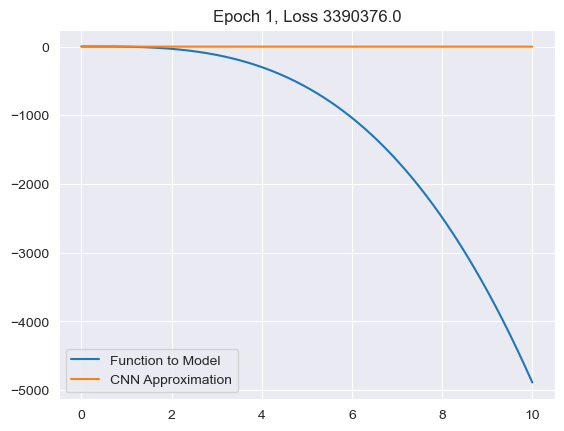

Finished epoch 0, latest loss 4255949.5
Finished epoch 1, latest loss 4254963.0
Finished epoch 2, latest loss 4253999.5
Finished epoch 3, latest loss 4253050.0
Finished epoch 4, latest loss 4252108.0
Finished epoch 5, latest loss 4251183.5
Finished epoch 6, latest loss 4250274.0
Finished epoch 7, latest loss 4249381.0
Finished epoch 8, latest loss 4248502.0
Finished epoch 9, latest loss 4247629.0
Finished epoch 10, latest loss 4246752.0
Finished epoch 11, latest loss 4245863.5
Finished epoch 12, latest loss 4244957.0
Finished epoch 13, latest loss 4244029.0
Finished epoch 14, latest loss 4243078.0
Finished epoch 15, latest loss 4242098.5
Finished epoch 16, latest loss 4241090.0
Finished epoch 17, latest loss 4240051.0
Finished epoch 18, latest loss 4238978.0
Finished epoch 19, latest loss 4237871.0
Finished epoch 20, latest loss 4236728.5
Finished epoch 21, latest loss 4235547.5
Finished epoch 22, latest loss 4234326.0
Finished epoch 23, latest loss 4233061.0
Finished epoch 24, latest 

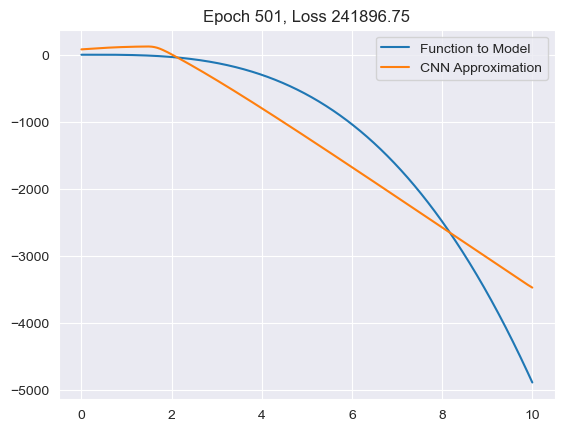

Finished epoch 500, latest loss 242599.15625
Finished epoch 501, latest loss 240735.796875
Finished epoch 502, latest loss 238887.046875
Finished epoch 503, latest loss 237053.65625
Finished epoch 504, latest loss 235235.953125
Finished epoch 505, latest loss 233433.84375
Finished epoch 506, latest loss 231647.796875
Finished epoch 507, latest loss 229878.15625
Finished epoch 508, latest loss 228125.875
Finished epoch 509, latest loss 226391.234375
Finished epoch 510, latest loss 224674.921875
Finished epoch 511, latest loss 222977.078125
Finished epoch 512, latest loss 221297.953125
Finished epoch 513, latest loss 219637.421875
Finished epoch 514, latest loss 217995.515625
Finished epoch 515, latest loss 216372.34375
Finished epoch 516, latest loss 214768.125
Finished epoch 517, latest loss 213183.5625
Finished epoch 518, latest loss 211618.5
Finished epoch 519, latest loss 210072.875
Finished epoch 520, latest loss 208546.578125
Finished epoch 521, latest loss 207039.40625
Finished e

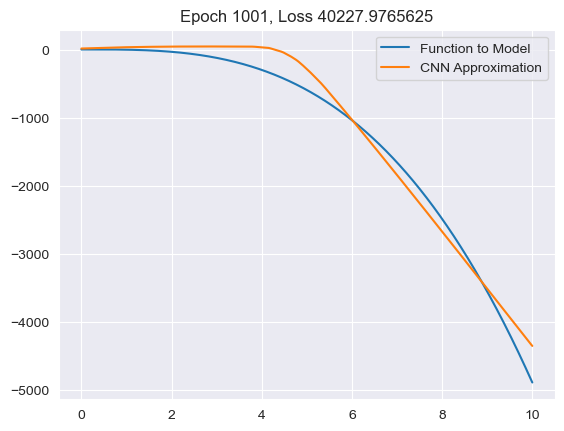

Finished epoch 1000, latest loss 35031.28515625
Finished epoch 1001, latest loss 34937.5859375
Finished epoch 1002, latest loss 34844.4140625
Finished epoch 1003, latest loss 34751.703125
Finished epoch 1004, latest loss 34659.64453125
Finished epoch 1005, latest loss 34567.9453125
Finished epoch 1006, latest loss 34476.65234375
Finished epoch 1007, latest loss 34385.8359375
Finished epoch 1008, latest loss 34295.453125
Finished epoch 1009, latest loss 34205.65625
Finished epoch 1010, latest loss 34116.33984375
Finished epoch 1011, latest loss 34027.42578125
Finished epoch 1012, latest loss 33938.96484375
Finished epoch 1013, latest loss 33850.8515625
Finished epoch 1014, latest loss 33763.19921875
Finished epoch 1015, latest loss 33675.9296875
Finished epoch 1016, latest loss 33589.15234375
Finished epoch 1017, latest loss 33502.828125
Finished epoch 1018, latest loss 33416.98828125
Finished epoch 1019, latest loss 33331.6640625
Finished epoch 1020, latest loss 33246.8125
Finished epo

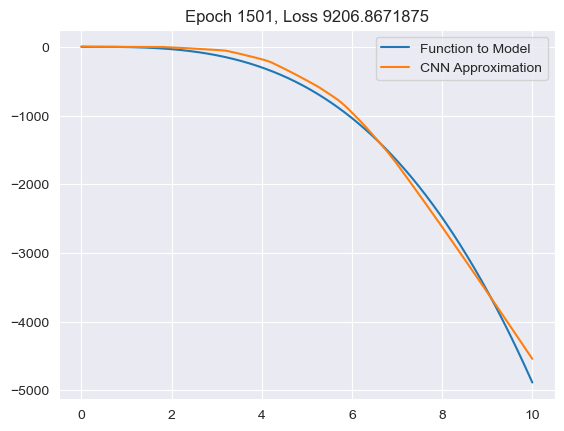

Finished epoch 1500, latest loss 9792.677734375
Finished epoch 1501, latest loss 9749.1123046875
Finished epoch 1502, latest loss 9705.544921875
Finished epoch 1503, latest loss 9662.0517578125
Finished epoch 1504, latest loss 9618.580078125
Finished epoch 1505, latest loss 9575.16796875
Finished epoch 1506, latest loss 9531.81640625
Finished epoch 1507, latest loss 9488.5439453125
Finished epoch 1508, latest loss 9445.33984375
Finished epoch 1509, latest loss 9402.2666015625
Finished epoch 1510, latest loss 9359.275390625
Finished epoch 1511, latest loss 9316.4072265625
Finished epoch 1512, latest loss 9273.5751953125
Finished epoch 1513, latest loss 9230.888671875
Finished epoch 1514, latest loss 9188.349609375
Finished epoch 1515, latest loss 9145.919921875
Finished epoch 1516, latest loss 9103.5634765625
Finished epoch 1517, latest loss 9061.3486328125
Finished epoch 1518, latest loss 9019.3310546875
Finished epoch 1519, latest loss 8977.4677734375
Finished epoch 1520, latest loss 

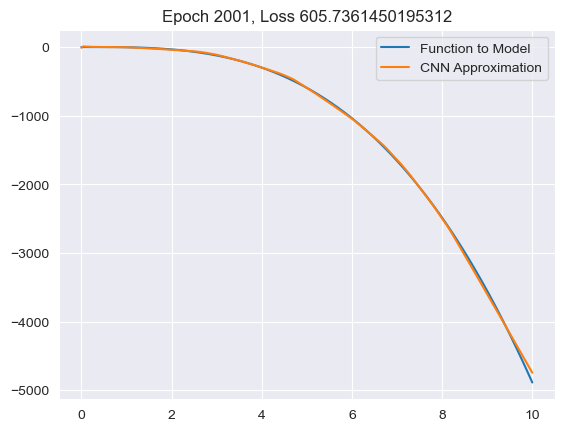

Finished epoch 2000, latest loss 836.8267211914062
Finished epoch 2001, latest loss 833.6819458007812
Finished epoch 2002, latest loss 830.5337524414062
Finished epoch 2003, latest loss 827.41552734375
Finished epoch 2004, latest loss 824.3021850585938
Finished epoch 2005, latest loss 821.2137451171875
Finished epoch 2006, latest loss 818.1343994140625
Finished epoch 2007, latest loss 815.0775146484375
Finished epoch 2008, latest loss 812.037109375
Finished epoch 2009, latest loss 809.0072021484375
Finished epoch 2010, latest loss 805.99609375
Finished epoch 2011, latest loss 803.0067138671875
Finished epoch 2012, latest loss 800.0293579101562
Finished epoch 2013, latest loss 797.0689086914062
Finished epoch 2014, latest loss 794.1263427734375
Finished epoch 2015, latest loss 791.2000122070312
Finished epoch 2016, latest loss 788.29052734375
Finished epoch 2017, latest loss 785.40087890625
Finished epoch 2018, latest loss 782.5250244140625
Finished epoch 2019, latest loss 779.667602539

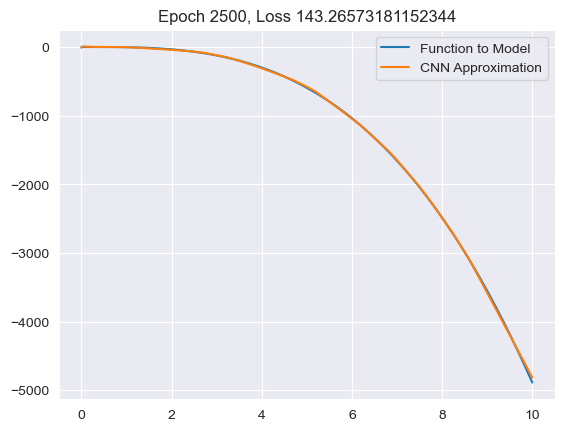

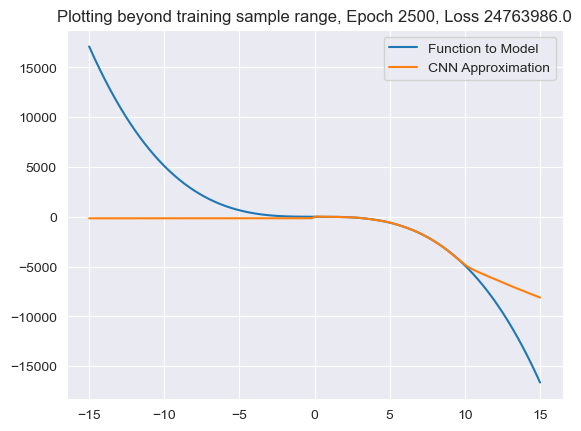

<Figure size 640x480 with 0 Axes>

In [107]:
n_epochs = 2500
#batch_size = num

for epoch in range(n_epochs):
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if not (epoch%500):
        plot(0,10,'')
    print(f'Finished epoch {epoch}, latest loss {loss}')

plot(0,10,'')
plot(-15,15,'Plotting beyond training sample range, ')

Plotting first derivative using autograd

In [127]:
def plot_f1(l,u,t):
    n_step = 1000

    X_plot = np.linspace(l,u,n_step)
    Y_plot = f_1(X_plot)

    #to obtain grads, requires_grad must be set to true
    X_temp = torch.linspace(l, u, steps=n_step, requires_grad=True).view(-1,1)
    Y_temp = torch.from_numpy(Y_plot).float().view(-1,1)

    #change y preds to deriv
    Y_preds = model(X_temp)
    Y_pred_plot = torch.reshape(Y_preds, (-1,)).detach().numpy()

    #differentiate output w.r.t. input, to grad_output order. Retaining graph allows the graph to be stored and not recalculated to be used subsequently.
    grads = torch.autograd.grad(outputs=Y_preds, inputs=X_temp, grad_outputs=torch.ones_like(Y_preds), retain_graph=True)[0]
    grad_plot = torch.reshape(grads, (-1,)).detach().numpy()

    loss_plot = loss_fn(grads, Y_temp)
    
    plt.plot(X_plot, Y_plot, X_plot, grad_plot)
    title = t + f"Epoch {epoch+1}, Loss {loss_plot}"
    plt.title(title)
    plt.legend(['Function to Model','CNN Approximation'])
    plt.show()
    plt.clf()

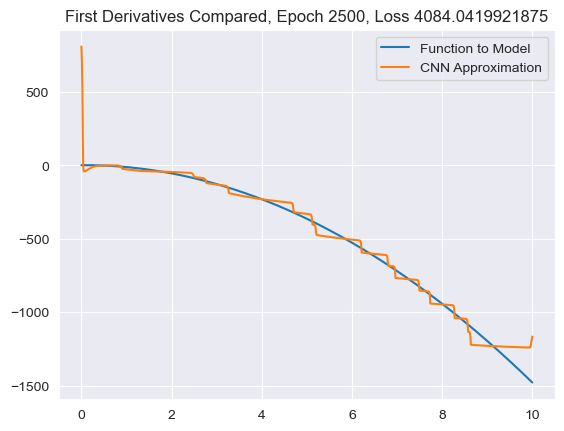

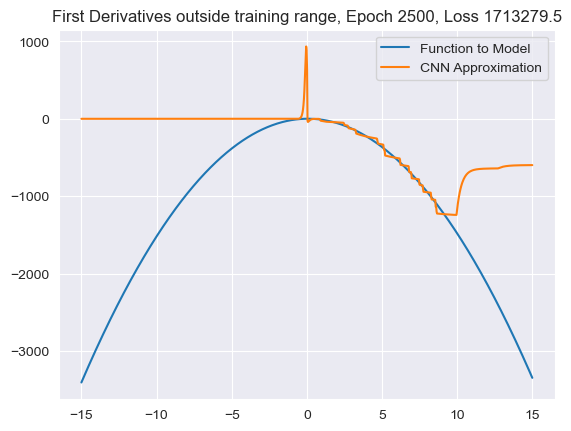

<Figure size 640x480 with 0 Axes>

In [128]:
plot_f1(0,10,'First Derivatives Compared, ')
plot_f1(-15,15,'First Derivatives outside training range, ')